**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Clase 9 - Cálculo diferencial (I)**


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

## La derivada en Python: aplicada

Claramente, en Python no vamos a derivar como "en la vida real". O sí. Depende.

### La derivada simbólica: `SymPy`

Empecemos por el caso que más familiar nos resulta: el de la derivada simbólica.

Este es el caso en el que tenemos una función, $f(x)$, y queremos derivarla. Sabemos cuál es la función, sabemos las reglas de derivación y dejamos que Python haga el resto.

Para este caso, usaremos la biblioteca `SymPy`.

Dado que se trata de funciones, usaremos variables simbólicas.

In [2]:
x, y = sp.symbols("x y", real=True )

Definamos una función univariable, `f`, que usa como variable a `x`. Tomemos una función cuadrática como ejemplo.

$$ f(x) = x^{2}$$

In [3]:
f = x**2

La función `sp.diff()` permite tomar derivadas (en rigor, diferenciar una función con respecto a símbolo/s).

La sintaxis de `sp.diff` es simple: `sympy.core.function.diff(f, *symbols, **kwargs)`

por lo que toma como argumentos:
- `f`: función a la que pretendemos diferenciar
- `symbols`: variable de diferenciación con respecto a la cual diferenciaremos `f`
- `kwargs`:  serie de atributos y argumentos opcionales

Diferenciemos `f` con respecto a `x`:

In [4]:
diff_f = sp.diff(f, x)

In [ ]:
diff_f

2*x

¿Es necesario incluir `symbols` como argumento cuando se trata de funciones univariables? No tanto...

In [5]:
sp.diff(f)

2*x

Pero, si complejizamos `f`:

$$ f\_(x, y) = x^{2} \cdot y$$

In [6]:
f_ = x**2 * y

In [ ]:
# sp.diff(f_)

Con `sp.diff()` podemos obtener la $n$-ésima derivada: utilizamos `sp.diff(f, x, n)`.

Supongamos $g(x) = \sin(x)$.

In [ ]:
g = sp.sin(x)

In [ ]:
g

sin(x)

Calculamos la primera derivada.

In [ ]:
dgdx = sp.diff(g)

In [ ]:
dgdx

cos(x)

Y ahora la segunda...

In [ ]:
d2gdx2 = sp.diff(g, x, 2)

In [ ]:
d2gdx2

-sin(x)

Lo que equivaldría a hacer:

In [ ]:
d2gdx2_ = sp.diff(dgdx, x)

In [ ]:
d2gdx2_

-sin(x)

O también podríamos calcular la derivada quinta de la función:

In [ ]:
d5gdx5 = sp.diff(g, x, 5)

In [ ]:
d5gdx5

cos(x)

#### Derivada simbólica puntual

Supongamos la función $q(x) = 24 \cdot x^{4} + 12 \cdot x^{2} - 6$

In [ ]:
q = 24 * x**4 + 12 * x**2 - 6

Calculemos su derivada primera, segunda y tercera:

In [ ]:
dqdx = sp.diff(q, x)

In [ ]:
dqdx

96*x**3 + 24*x

In [ ]:
d2qdx2 = sp.diff(q, x, 2)

In [ ]:
d2qdx2

24*(12*x**2 + 1)

In [ ]:
d3qdx3 = sp.diff(q, x, 3)

In [ ]:
d3qdx3

576*x

Ahora, queremos *evaluar* el valor de esas derivadas en un $x$ aribtrario: 6.

Para evaluar la función utilizaremos una combinación de funciones:
- `sympy.subs()`: substituye todas las apariciones de *algo* por otra cosa. Lo definimos como una lista de `tuples`, y podemos pasar más de un argumento. Generalmente utilizado para evaluar una expresión en un punto determinado.
- `evalf()`: es un método en `SymPy` para evaluar expresiones simbólicas y convertirlas en valores `float`.

La primera derivada, evaluada en $x = 6$, es:

In [ ]:
dqdx.subs([(x, 6)]).evalf()

20880.0000000000

Chequeamos:

In [ ]:
96*(6)**3 + 24*(6)

20880

Lo mismo para la segunda y tercera derivada:

In [ ]:
d2qdx2.subs([(x, 6)]).evalf()

10392.0000000000

In [ ]:
d3qdx3.subs([(x, 6)]).evalf()

3456.00000000000

#### Función derivada simbólica y gráfico

¿Y si quisiéramos evaluar toda la función derivada (y no solo en un punto)?

Notemos que las expresiones simbólicas de arriba requieren que sea posible que $x$ no sea un número sino un `array`.

Para ello, usamos `sp.lambdify()` una función en `SymPy` que convierte expresiones simbólicas en funciones de Python (como las que ya conocemos) que pueden ser evaluadas **numéricamente**.

`sp.lambdify()` es particularmente útil para evaluar de manera eficiente expresiones a lo largo de valores numéricos, especialmente porque permite no utilizar el método `.subs()` repetidas veces.

**Nerd remark**: `sp.lambdify` funciona como `.evalf()` pero a lo largo de un rango de valores. Este tipo de funciones se denominan funciones `lambda`, un tipo de funciones "anónimas" (no definidas con `def`, como vimos) que aplican *iterativamente* una determinada transformación a *algo*.

Quedan fuera del alcance de este curso, pero pueden saber más [acá](https://www.geeksforgeeks.org/python/python-lambda-anonymous-functions-filter-map-reduce/).

La sintaxis de `sp.lambdify()` toma 2 argumentos:
- `vars`: las variables que constituyen la expresión que queremos *labdificar*
- `expr`: la expresión simbólica que queremos *lambdificar*

Definamos, ahora, un rango de valores para $x$. Utilizamos `np.linspace`:

In [ ]:
x_vals = np.linspace(-2, 2, 1000)

Ahora, definamos cada objeto de `sp.lambdify`, siguiendo la sintaxis correspondiente.

In [ ]:
q_f = sp.lambdify(x, q)

In [ ]:
dqdx_f = sp.lambdify(x, dqdx)

In [ ]:
d2qdx2_f = sp.lambdify(x, d2qdx2)

In [ ]:
d3qdx3_f = sp.lambdify(x, d3qdx3)

Evaluemos cada objeto de `sp.lambdify` a lo largo de los valores de $x$ dados.

In [ ]:
q_vals = q_f(x_vals)

In [ ]:
dqdx_vals = dqdx_f(x_vals)

In [ ]:
# dqdx_vals

In [ ]:
d2qdx2_vals = d2qdx2_f(x_vals)

In [ ]:
d3qdx3_vals = d3qdx3_f(x_vals)

Para mayor facilidad, grafiquemos de manera sencilla.

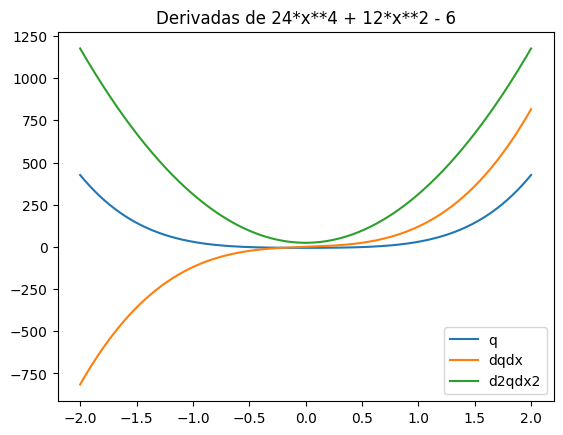

In [ ]:
plt.plot(x_vals, q_vals, label="q")
plt.plot(x_vals, dqdx_vals, label="dqdx")
plt.plot(x_vals, d2qdx2_vals, label="d2qdx2")
# plt.plot(x_vals, d3qdx3_vals, label="d3qdx3")
plt.legend()
plt.title(f"Derivadas de {q}")
plt.show()

In [ ]:
plt.close()

#### Interpretación

Hasta acá, calculamos derivadas sucesivas simbólicas en `SymPy`. Agreguemos un poco de teoría.

- la primera derivada, genéricamente $f^{\prime} (x)$, se interpreta como:
  - analíticamente: la tasa de variación instantánea de la función
  - geométricamente: la pendiente de la recta tangente en un punto

  Algunos puntos clave:
  - si $f^{\prime}(x) > 0$, entonces la función es creciente
  - si $f^{\prime}(x) < 0$, entonces la función es decreciente
  - si $f^{\prime}(x) = 0$, entonces la función es constante, y el punto donde se cumple esta condición es candidato a un máximo, mínimo o punto de inflexión

- la segunda derivada, genéricamente $f^{\prime \prime} (x)$, se interpreta como:
  - analíticamente: la tasa de aceleración o cambio de la pendiente
  - geométricamente: la curvatura de la función

  Algunos puntos clave:
  - si $f^{\prime \prime}(x) > 0$, entonces la función es cóncava "hacia arriba" (tiene mínimo local)
  - si $f^{\prime \prime}(x) < 0$, entonces la función es cóncava "hacia abajo" (tiene máximo local)
  - si $f^{\prime \prime}(x) = 0$, entonces el punto donde se cumple esta condición es candidato a un punto de inflexión (dependiendo del cambio de signo)

#### Complejizaciones y `sp.simplify`

Supongamos la función $$r(x) = (x^{2} + 2 \cdot x + 1) \cdot e^{\ln(x^{2})} + \dfrac{\sin^2(x) + \cos^2(x)}{x}
$$

In [ ]:
r = (x**2 + 2*x + 1) * sp.exp(sp.log(x**2)) + (sp.sin(x)**2 + sp.cos(x)**2)/x

Notemos que esta función tiene un montón de redundancias:
- $(x^{2} + 2 \cdot x + 1) = (x + 1)^{2}$
- $e^{\ln(x^{2})} = x^{2}$ para $x > 0$
- $sin^{2}(x) + cos^{2}(x) = 1$

Si deriváramos $r$...

In [ ]:
drdx = sp.diff(r, x)

In [ ]:
drdx

x**2*(2*x + 2) + 2*x*(x**2 + 2*x + 1) - (sin(x)**2 + cos(x)**2)/x**2

...las redundancias se mantienen.

Pero `sp.simplify` nos permite simplificar esta expresión "lo más posible".

In [ ]:
drdx_simpl = sp.simplify(drdx)

In [ ]:
drdx_simpl

4*x**3 + 6*x**2 + 2*x - 1/x**2

#### Poder de cómputo

El poder de cómputo de `SymPy` es enorme.

Probémoslo.

Sabemos que derivar $f(x) = x^{2}$ es simple, incluso a mano.

Proponemos $h(x)$: $$
h(x)=
x^{x}\,e^{\sin(x^{2})}\,\log\!\big(\Gamma(x+1)\big)
\;+\; \operatorname{Ei}(x^{2})\, I_{0}(x)\,\cosh(x)
\;+\; \mathrm{Li}_{2}(-x)^{2}
\;+\; \int_{0}^{\infty} e^{-tx}\,\sin(t^{2})\,dt
\;+\; \sum_{n=1}^{\infty} \frac{\zeta(n+1)}{n!}\,x^{n}
$$

In [ ]:
t, n = sp.symbols("t n", real=True)

In [ ]:
h = (
    x**x * sp.exp(sp.sin(x**2)) * sp.log(sp.gamma(x + 1))                           # x^x * e^{sin(x^2)} * log(Gamma)
    + sp.Ei(x**2) * sp.besseli(0, x) * sp.cosh(x)                                   # Ei * Bessel I0 * cosh
    + sp.polylog(2, -x)**2                                                          # Li_2(-x)^2
    + sp.Integral(sp.exp(-t*x) * sp.sin(t**2), (t, 0, sp.oo))                        # Integral impropia
    + sp.summation(sp.zeta(n + 1) * x**n / sp.factorial(n), (n, 1, sp.oo))          # Serie infinita
)

In [ ]:
h

x**x*exp(sin(x**2))*log(gamma(x + 1)) + cosh(x)*Ei(x**2)*besseli(0, x) + polylog(2, -x)**2 + Integral(exp(-t*x)*sin(t**2), (t, 0, oo)) + Sum(x**n*zeta(n + 1)/factorial(n), (n, 1, oo))

Tomemos la derivada de esto...

In [ ]:
dhdx = sp.diff(h, x)

In [ ]:
dhdx

2*x*x**x*exp(sin(x**2))*log(gamma(x + 1))*cos(x**2) + x**x*(log(x) + 1)*exp(sin(x**2))*log(gamma(x + 1)) + x**x*exp(sin(x**2))*polygamma(0, x + 1) + sinh(x)*Ei(x**2)*besseli(0, x) + cosh(x)*Ei(x**2)*besseli(1, x) + Integral(-t*exp(-t*x)*sin(t**2), (t, 0, oo)) + Sum(n*x**n*zeta(n + 1)/(x*factorial(n)), (n, 1, oo)) + 2*exp(x**2)*cosh(x)*besseli(0, x)/x + 2*polylog(1, -x)*polylog(2, -x)/x

Simplificando...

In [ ]:
dhdx_simpl = sp.simplify(dhdx)

In [ ]:
dhdx_simpl

x**x*exp(sin(x**2))*log(x)*log(gamma(x + 1)) + x**x*exp(sin(x**2))*log(gamma(x + 1)) + x**x*exp(sin(x**2))*polygamma(0, x + 1) + 2*x**(x + 1)*exp(sin(x**2))*log(gamma(x + 1))*cos(x**2) - Piecewise((2*sqrt(2)*(-sqrt(2)*sqrt(pi)*x**3*sin(x**2/4)*gamma(-3/4)*gamma(7/4)/32 + sqrt(2)*sqrt(pi)*x**3*cos(x**2/4)*gamma(-1/4)*gamma(5/4)/32 + x**2*(sqrt(2)*sqrt(pi)*x*(-sin(x**2/4)*fresnelc(sqrt(2)*x/(2*sqrt(pi))) + cos(x**2/4)*fresnels(sqrt(2)*x/(2*sqrt(pi))))/16 + 1/8)*gamma(1/4)*gamma(3/4))/(pi*x**2), Abs(arg(x)) < pi/2), (Integral(t*exp(-t*x)*sin(t**2), (t, 0, oo)), True)) + sinh(x)*Ei(x**2)*besseli(0, x) + cosh(x)*Ei(x**2)*besseli(1, x) + Sum(x**(n - 1)*zeta(n + 1)/gamma(n), (n, 1, oo)) + 2*exp(x**2)*cosh(x)*besseli(0, x)/x + 2*polylog(1, -x)*polylog(2, -x)/x

Y todo en...

In [ ]:
#@title [código oculto]
import time
start = time.time()
dhdx_time = sp.diff(h, x)
dhdx_simpl_time = sp.simplify(dhdx)
end = time.time()
print(f"{end - start} segundos")

1.4790542125701904 segundos


O calcular la cuarta derivada:

In [ ]:
d4hdx4 = sp.diff(h, x, 4)

In [ ]:
d4hdx4

48*x**4*x**x*exp(sin(x**2))*log(gamma(x + 1))*sin(x**2)**2 - 96*x**4*x**x*exp(sin(x**2))*log(gamma(x + 1))*sin(x**2)*cos(x**2)**2 + 16*x**4*x**x*exp(sin(x**2))*log(gamma(x + 1))*sin(x**2) + 16*x**4*x**x*exp(sin(x**2))*log(gamma(x + 1))*cos(x**2)**4 - 64*x**4*x**x*exp(sin(x**2))*log(gamma(x + 1))*cos(x**2)**2 - 96*x**3*x**x*(log(x) + 1)*exp(sin(x**2))*log(gamma(x + 1))*sin(x**2)*cos(x**2) + 32*x**3*x**x*(log(x) + 1)*exp(sin(x**2))*log(gamma(x + 1))*cos(x**2)**3 - 32*x**3*x**x*(log(x) + 1)*exp(sin(x**2))*log(gamma(x + 1))*cos(x**2) - 96*x**3*x**x*exp(sin(x**2))*sin(x**2)*cos(x**2)*polygamma(0, x + 1) + 32*x**3*x**x*exp(sin(x**2))*cos(x**2)**3*polygamma(0, x + 1) - 32*x**3*x**x*exp(sin(x**2))*cos(x**2)*polygamma(0, x + 1) - 24*x**2*x**x*(log(x) + 1)**2*exp(sin(x**2))*log(gamma(x + 1))*sin(x**2) + 24*x**2*x**x*(log(x) + 1)**2*exp(sin(x**2))*log(gamma(x + 1))*cos(x**2)**2 - 48*x**2*x**x*(log(x) + 1)*exp(sin(x**2))*sin(x**2)*polygamma(0, x + 1) + 48*x**2*x**x*(log(x) + 1)*exp(sin(x**2))*cos(

Como antes, también podemos obtener valores "particulares" de la derivada (derivada puntual). Para ello, utilizamos `.subs()` y `.evalf()`:

In [ ]:
d4hdx4.subs([(x, 2), (t, 1), (n, 2)]).evalf()

118084.483085684

### La derivada numérica: `NumPy`

Sin embargo, no siempre tenemos una fórmula.

A veces, solo tenemos datos (a través del tiempo, por ejemplo) y queremos ver su tasa de cambio.

Hagamos una base de datos de ejemplo.

La definiremos sobre el siguiente rango:

In [ ]:
x = np.linspace(0, 10, 50)

Luego, generaremos dos variantes de la base de datos: una `smooth` (suavizada) y una `noisy` (con el ruido típico de los datos).

In [ ]:
y_smooth = np.sin(x)

In [ ]:
np.random.seed(42)  # para reproducibilidad
y_noisy = np.sin(x) + np.random.uniform(-0.75, 0.75, size=len(x))

Visualizando ambas series.

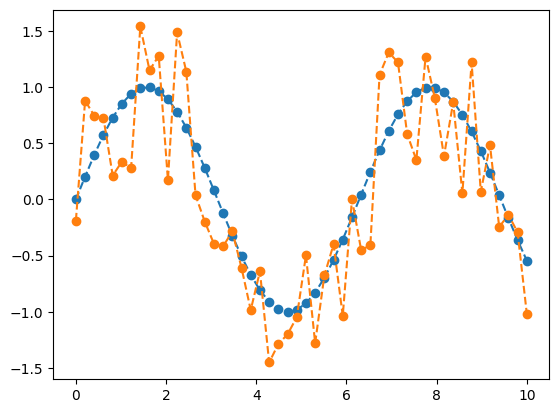

In [ ]:
plt.plot(
    x,
    y_smooth,
    "o--")
plt.plot(
    x,
    y_noisy,
    "o--")

#### Cálculo por gradiante con `np.gradient`

Empecemos usando `y_smooth`.

Estos datos no distan mucho de una función definida rigurosamente, solo que sin saber la función subyacente.

La forma más fácil de tomar la derivada de este tipo de construcciones es utilizando el [gradiente](https://es.wikipedia.org/wiki/Gradiente); básicamente, la derivada *discreta* en cada punto.

Para ello, utilizamos `np.gradient()`, la función de `NumPy` que devuelve el gradiente de un `array` de $N$ dimensiones.

La sintaxis de `np.gradient` es simple: solo requiere especificar `f`, el `array` $N$-dimensional que contiene las muestras de la función escalar.

También podemos introducir un parámetro opcional, `varargs`, que toma la forma de una `list` que nos da el *espaciado* entre los valores de `f`. Si no es especificado, asume espaciado unitario para todas las dimensiones.

In [ ]:
dsmooth_dx = np.gradient(y_smooth)

In [ ]:
dsmooth_dx

array([ 0.20266794,  0.19846207,  0.18601905,  0.16585532,  0.13880776,
        0.105999  ,  0.06879075,  0.02872735, -0.01252838, -0.05326413,
       -0.09178914, -0.12650446, -0.15596921, -0.17896046, -0.19452397,
       -0.20201377, -0.20111899, -0.19187679, -0.17467074, -0.15021499,
       -0.11952458, -0.0838733 , -0.04474086, -0.00375146,  0.03739365,
        0.07698673,  0.11338449,  0.14507622,  0.17074658,  0.1893301 ,
        0.20005549,  0.20247758,  0.19649585,  0.18235856,  0.16065249,
        0.13227855,  0.09841439,  0.06046555,  0.02000708, -0.02128177,
       -0.06168733, -0.09953256, -0.13324669, -0.16143043, -0.182914  ,
       -0.19680573, -0.20252905, -0.19984642, -0.18886916, -0.18134268])

Notemos que el resultado del gradiente tiene misma forma que nuestros datos.

In [ ]:
len(y_smooth)

50

In [ ]:
len(dsmooth_dx)

50

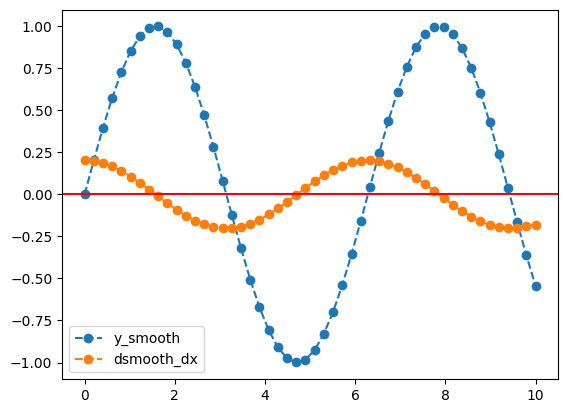

In [ ]:
plt.plot(x, y_smooth, "o--", label="y_smooth")
plt.plot(x, dsmooth_dx, "o--", label="dsmooth_dx")
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

Peeeero...los datos no suelen ser tan "lindos".

Tomemos `y_noisy`, y repitamos el cálculo del gradiente.

In [ ]:
dnoisy_dx = np.gradient(y_noisy, x)

In [ ]:
dnoisy_dx

array([ 5.22795317,  2.28610696, -0.38231179, -1.30401818, -0.94663202,
        0.15948388,  2.94699216,  2.1364044 , -0.64241969, -2.39444387,
        0.51248518,  2.36370686, -3.54832158, -3.26792621, -1.05950211,
       -0.53998398,  0.26898524, -0.47088855, -1.71409942, -0.07489201,
       -1.14329757, -1.58590696,  0.61450961,  0.58404346,  1.72237076,
       -0.56502105, -0.44012611,  2.15419589, -0.88244807,  0.98332129,
        1.43624277, -1.00152259,  3.82330784,  4.20319007,  0.27090313,
       -1.78107722, -2.12968471,  1.69138196,  1.35665011, -2.17034655,
       -0.1000532 , -0.80982224,  0.86906853,  0.03362952, -1.80326168,
       -0.76982633, -1.51591179, -0.11562536, -2.15736873, -3.54821945])

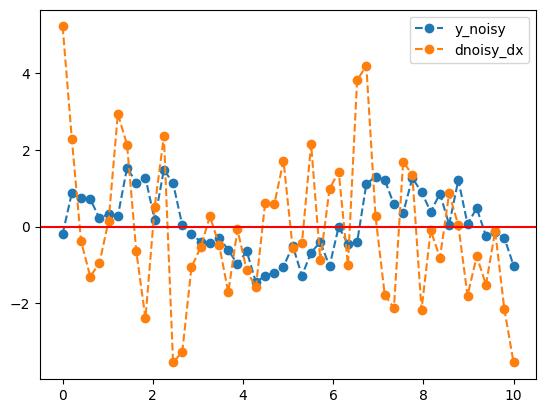

In [ ]:
plt.plot(x, y_noisy, "o--", label="y_noisy")
plt.plot(x, dnoisy_dx, "o--", label="dnoisy_dx")
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

Vemos que no se puede apreciar la diferencia...

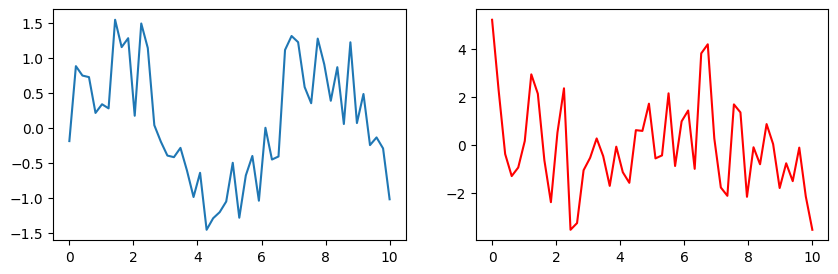

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(x, y_noisy, label="y_noisy")
ax[1].plot(x, dnoisy_dx, label="dnoisy_dx", color="r")

Sigue sin decirnos nada. ¿Por qué?

El ruido no solo se transmite de `y_noisy` a su derivada, sino que se amplifica. Esto impide ver el proceso subyacente.

Entonces, `np.gradient` no es bueno cuando los datos tienen ruido (son *noisy*).

#### *Smoothear*, luego derivar

La mejor forma para trabajar con datos *noisy* es atacar el problema "de raíz": transformamos los datos de *noisy* a *smooth*, y luego trabajamos con los datos para calcular las derivadas.

Se entenderá mejor con un ejemplo. Tomemos datos diarios en dólares corrientes de los precios del *stock* de YPF, entre enero del 2008 y diciembre del 2019.

Usemos `Pandas` y `pd.read_excel`.

In [ ]:
ypf = pd.read_excel("/content/YPF.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/content/YPF.xlsx'

In [ ]:
ypf.columns

In [ ]:
x = range(len(ypf))

Visualizamos la serie.

In [ ]:
plt.plot(ypf["date"], ypf["price"])

Vemos que es (muy) *noisy*.

Si tomáramos la derivada con `np.gradient` de la función sin *smoothear*...

In [ ]:
dypf_dx = np.gradient(ypf["price"], x)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(
    ypf["date"],
    ypf["price"],
    label="ypf_price")

ax[1].plot(
    ypf["date"],
    dypf_dx,
    label="dypf_dx",
    color="r")

plt.axhline(y=0, color='black', linestyle='-')

ax[0].set_ylabel('$')
ax[1].set_ylabel('Gradiente')

plt.setp(
      [a.get_xticklabels() for a in ax],
      rotation=30,
      horizontalalignment='right')

[a.legend() for a in ax]

plt.show()

¿Qué podemos decir sobre estos datos? Absolutamente nada. La derivada no es lo suficientemente clara como para indicar períodos de crecimiento y decrecimiento del precio de la acción.

Utilizaremos un método de "convolución" para *suavizar* los datos.

La *convolución* es una operación matemática que combina dos funciones para describir la superposición entre ambas. La convolución toma dos funciones, “desliza” una sobre la otra, multiplica los valores de las funciones en todos los puntos de superposición, y suma los productos para crear una nueva función.

En particular, vamos a utilizar un *rolling average* (promedio móvil) con una ventana de tiempo definida arbitrariamente (de 14 días, por ejemplo).

Así, lo que haremos -en orden- será:
1. definir un rectángulo de área igual 1 , para nuestra ventana de tiempo
2. aplicaremos este rectángulo a intervalos definidos de nuestra función

Definamos nuestro rectángulo...

In [ ]:
rect = np.ones(15)/15

In [ ]:
rect

Vemos que se trata de 14 valores, cada uno definido como $\dfrac{1}{14}$, de manera que el área del rectángulo es igual a 1.

Luego, utilizamos `np.convolve` para crear una la convolución, una función que devuelve la convolución lineal discreta de dos secuencias uni-dimensionales.

No cubriremos `np.convolve` en profundidad, pero pueden ver más en la [documentación](https://numpy.org/doc/2.0/reference/generated/numpy.convolve.html).

In [ ]:
ypf_smooth = np.convolve(ypf["price"], rect, mode="valid")

In [ ]:
dypfsmooth_dx = np.gradient(ypf_smooth, x[7:-7])

¿Cómo podríamos *suavizar* estos datos? Por ejemplo, podríamos hacerlo tomando ventanas de tiempo

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Noisy
ax[0].plot(
    ypf["date"],
    ypf["price"],
    label="ypf_price",
    alpha=0.2)

ax[1].plot(
    ypf["date"],
    dypf_dx,
    label="dypf_dx",
    color="r",
    alpha=0.2)

# Smooth
ax[0].plot(
    ypf["date"][7:-7],
    ypf_smooth,
    label="ypf_smooth")

ax[1].plot(
    ypf["date"][7:-7],
    dypfsmooth_dx,
    label="dypfsmooth_dx",
    color="purple")

plt.axhline(y=0, color='black', linestyle='-')

ax[1].set_ylim(-1.25,1.25)
ax[0].set_ylabel('$')
ax[1].set_ylabel('Gradiente')

plt.setp(
      [a.get_xticklabels() for a in ax],
      rotation=30,
      horizontalalignment='right')

[a.legend() for a in ax]

plt.show()

## Derivando funciones organizacionales

Apliquemos todo lo visto a funciones organizacionales.

### Monotonía vía derivada

Supongamos funciones típicas de:
- ingreso total (demanda lineal): $R(q) = a \cdot q - b \cdot q^{2}$
- costo total: $C(q) = c_{0} + c_{1} \cdot q + c_{2} \cdot q^{2}$
- beneficio total: $R(q) - C(q)$

Las definimos con `SymPy`.

Primero, definimos los símbolos.

In [ ]:
q = sp.symbols('q', real=True)
a, b, c = sp.symbols("a b c", real=True)
F, c0, c1, c2, c3 = sp.symbols("F c0 c1 c2 c3", real=True)

Luego, definimos las funciones.

Primero, la función de demanda inversa, $p(q)$:

In [ ]:
p = a - b * q + c * sp.log(1+q)

Luego, el ingreso total:

In [ ]:
R = p * q

In [ ]:
R

De igual manera, definimos la función de costo total:

In [ ]:
C = F + c0*q - c1 * (q**2) + c2 * (q**3) + c3 * (sp.sqrt(q))

In [ ]:
C

Por último, el beneficio total, $B(q)$, siendo la diferencia entre el ingreso total y el costo total: $$B(q) = R(q) - C(q)$$

In [ ]:
B = R - C

In [ ]:
B

Ahora, buscamos las funciones marginales a partir de las funciones totales.

El ingreso marginal, el costo marginal y el beneficio marginal son conceptos económicos derivados de la función de ingreso, costo y beneficio respectivamente. Cada uno se interpreta como la variación en la magnitud total correspondiente cuando se produce o vende una unidad adicional:
- Ingreso marginal (MR): es la variación del ingreso total cuando la empresa vende una unidad adicional de producto. Matemáticamente, es la derivada del ingreso total respecto a la cantidad vendida $$ MR = \dfrac{d R(q)}{d q}$$

  Indica cuánto dinero extra recibe la empresa por vender una unidad adicional.

- Costo marginal (MC): es la variación del costo total cuando se produce una unidad adicional de producto. Se define como la derivada del costo total respecto a la cantidad producida:  $$ MC(q) = \dfrac{d C(q)}{d q}$$

  Representa el costo adicional de producir una unidad más.

- Beneficio marginal (MB): es la variación del beneficio total al producir o vender una unidad más. Como el beneficio se define como ingreso menos costo ($B(q) = R(q) - C(q)$), el beneficio marginal se obtiene derivando esa función: $$ MB(q) = \dfrac{d B(q)}{d q} = MR(q) - MC(q)$$

  Indica cuánto aumenta (o disminuye) el beneficio por la última unidad producida o vendida

Ahora, las definimos simbólicamente en `SymPy`:

In [ ]:
MR = sp.diff(R, q)
MC = sp.diff(C, q)
MB = sp.diff(B, q)

Y, de paso, definimos también las segundas derivadas en `SymPy`:

In [ ]:
dMR = sp.diff(R, q, 2)
dMC = sp.diff(C, q, 2)
dMB = sp.diff(B, q, 2)

Definamos un rango de valores.

In [ ]:
q_vals = np.linspace(0, 20, 200)

Definimos valores para los parámetros.

In [ ]:
params = {
    a: 160,
    b: 6,
    c: 0.8,
    F: 20,
    c0: 12,
    c1: 2.5,
    c2: 0.15,
    c3: 3
}

Ahora, definamos cada objeto de `sp.lambdify`, siguiendo la sintaxis correspondiente.

In [ ]:
R_f = sp.lambdify(q, R.subs(params))
C_f = sp.lambdify(q, C.subs(params))
B_f = sp.lambdify(q, B.subs(params))
MR_f = sp.lambdify(q, MR.subs(params))
MC_f = sp.lambdify(q, MC.subs(params))
MB_f = sp.lambdify(q, MB.subs(params))
dMR_f = sp.lambdify(q, dMR.subs(params))
dMC_f = sp.lambdify(q, dMC.subs(params))
dMB_f = sp.lambdify(q, dMB.subs(params))

Evaluemos cada objeto de `sp.lambdify` a lo largo de los valores de $x$ dados.

In [ ]:
R_vals = R_f(q_vals)
C_vals = C_f(q_vals)
B_vals = B_f(q_vals)
MR_vals = MR_f(q_vals)
MC_vals = MC_f(q_vals)
MB_vals = MB_f(q_vals)
dMR_vals = dMR_f(q_vals)
dMC_vals = dMC_f(q_vals)
dMB_vals = dMB_f(q_vals)

#### Determinación de intervalos relevantes (crecimiento y decrecimiento)

Nuestro objetivo, ahora, es determinar intervalos de crecimiento y decrecimiento de las funciones modeladas más arriba (y, más en general, de fenómenos organizacionales).

Nos valdremos, en primera instancia, de un análisis aritmético.

Sea una función total $f(x)$ (puede ser $I(q)$, $C(q)$ o $B(q)$).

Para saber si la función $f(x)$ es (de)creciente en un punto, se calcula la derivada primera, $f^{\prime}(x)$: $$f^{\prime}(x) = \frac{df}{dx} $$

que, como dijimos, mide la *pendiente* de la curva.

Si...

- ... $ f^{\prime}(x) > 0 $ en un intervalo, la función es **creciente** en ese intervalo.  
- ... $ f^{\prime}(x) < 0 $ en un intervalo, la función es **decreciente** en ese intervalo.  
- ... $ f^{\prime}(x) = 0 $, se obtiene un **punto crítico**: puede ser máximo, mínimo o punto de inflexión (esto se afina con la segunda derivada).

Analicemos, entonces, la segunda derivada, $f^{\prime \prime}(x)$: $$f^{\prime \prime}(x) = \frac{d^2 f}{dx^2}$$

que mide la *curvatura* de la función, es decir, cómo cambia la pendiente de la función en cada punto.

Si...
- ... $ f^{\prime \prime}(x) > 0 $, la función es *cóncava hacia arriba* y tiene forma de "U".  
  - el punto crítico identificado con $ f^{\prime}(x) = 0 $ es un **mínimo local**.
- ... $ f^{\prime \prime}(x) < 0 $, la función es *cóncava hacia abajo* y tiene forma de "U" invertida.  
  - el punto crítico identificado con $ f^{\prime}(x) = 0 $ es un **máximo local**.  

- ... $ f^{\prime \prime}(x) = 0 $, el punto puede ser de **inflexión** (cambio en la curvatura).

Con toda esta información...*plotteemos*.

In [ ]:
plt.plot(q_vals, R_vals, label="R")
plt.plot(q_vals, MR_vals, label="MR")
plt.plot(q_vals, dMR_vals, label="dMR")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.title("Ingreso total y marginal")
plt.show()

Notamos que, en el caso del ingreso, la derivada (es decir, el ingreso marginal, $MR$) es 0 (candidato al óptimo) en aproximadamente...

In [ ]:
print(f"q = {q_vals[(np.abs(MR_vals - 0)).argmin()]:2f}")

...donde se verifica que la segunda derivada es...

In [ ]:
print(f"dMR = {dMR_vals[(np.abs(MR_vals - 0)).argmin()]:2f}")

... por lo que la función es *cóncava hacia abajo* y el punto es un *máximo local*.

¿Qué sucede en el lado del costo?

In [ ]:
plt.plot(q_vals, C_vals, label="C")
plt.plot(q_vals, MC_vals, label="MC")
plt.plot(q_vals, dMC_vals, label="dMC")
plt.ylim(-10, 75)
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.title("Costo y costo marginal")

plt.show()

Notamos que, ahora, hay 2 valores que generan que el costo marginal ($MC$) se iguale a 0:

In [ ]:
for q in sorted(np.argsort(np.abs(MC_vals - 0))[:2]):
  print(f"q = {q_vals[q]:2f}")

Sin embargo, una inspección gráfica rápida nos muestra que uno de ellos es un máximo local, y otro es un mínimo local...

In [ ]:
for q in sorted(np.argsort(np.abs(MC_vals - 0))[:2]):
  print(f"{q_vals[q]:2f}: dMR = {dMC_vals[q]:2f}")

De esta manera, se denota que:
- para $q \approx 3.92$, $C^{\prime \prime} (q) < 0$, por lo que la función es *cóncava hacia abajo* y el punto es un *máximo local*.
- para $q \approx 7.24$, $C^{\prime \prime} (q) > 0$, por lo que la función es *cóncava hacia arriba* y el punto es un *mínimo local*.

Por último, verifiquemos el lado del beneficio.

In [ ]:
plt.plot(q_vals, B_vals, label="B")
plt.plot(q_vals, MB_vals, label="MB")
plt.plot(q_vals, dMB_vals, label="dMB")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.title("Beneficio total y marginal")
plt.show()

Notamos que, en el caso del beneficio, la derivada (es decir, el ingreso marginal, $MR$) es 0 (candidato al óptimo) en aproximadamente...

In [ ]:
print(f"q = {q_vals[(np.abs(MB_vals - 0)).argmin()]:2f}")

...donde se verifica que la segunda derivada es...

In [ ]:
print(f"dMB = {dMB_vals[(np.abs(MB_vals - 0)).argmin()]:2f}")

... por lo que la función es *cóncava hacia abajo* y el punto es un *máximo local*.

Por último, nótese que se cumple que...

In [ ]:
plt.plot(q_vals, B_vals, label="B")
plt.plot(q_vals, dMB_vals, label="dMB")
plt.plot(q_vals, MR_vals, label="MR")
plt.plot(q_vals, MC_vals, label="MC")
plt.axvline(q_vals[(np.abs(MB_vals - 0)).argmin()],
            color='black',
            linestyle='--')

plt.legend()
plt.title("Beneficio total y marginal")
plt.show()

... el ingreso marginal ($MR$) y el costo marginal ($MC$) se igualan en...

In [ ]:
print(f"q = {q_vals[(np.abs(MB_vals - 0)).argmin()]:2f}")

...donde se optimiza la función de beneficio.